#  Vehicle dataset

The problem that we are going to solve here is that given a set of features that describe vehicles, our machine learning model must predict price of car.To train our machine learning model with vehicle dataset, we will try Randome Forest regressor algorithm.

### Dataset information

Vehicle dataset has 301 rows with 9 attributes or features for various cars.

```
Vehicle dataset Attribute Information (in order):
    
        - Car_Name         Name of the cars.
        - Year             Year of the car when it was bought.
        - Selling_Price    Price at which the car is being sold
        - Present_Price    This is the current ex-showroom price of the car. 
        - Kms_Driven       Number of Kilometres the car is driven.
        - Fuel_Type        Fuel type of car (petrol / diesel / CNG / LPG / electric).
        - Seller_Type      Tells if a Seller is Individual or a Dealer.
        - Transmission     Gear transmission of the car (Automatic/Manual).
        - Owner            Number of previous owners of the car.
```

In [3]:
# importing libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
import pickle

In [4]:
# Reading data
data = pd.read_csv('car data.csv')

In [5]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
# print shape of dataframe
data.shape

(301, 9)

In [7]:
# Cheching for missing values
data.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
# Checking for unique values in categorical columns
categ = ['Fuel_Type','Seller_Type','Transmission','Owner']
for column in categ:
    print(column, data[column].unique())

Fuel_Type ['Petrol' 'Diesel' 'CNG']
Seller_Type ['Dealer' 'Individual']
Transmission ['Manual' 'Automatic']
Owner [0 1 3]


In [9]:
# info about data
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [10]:
data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [11]:
# Drop column 'Car_Name'
data = data[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [12]:
data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [13]:
# Creating new feature
data['Current_year'] = 2021
data['No_year'] = data['Current_year'] - data['Year']

In [14]:
data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_year,No_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021,7
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021,8
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021,4
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021,10
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021,7


In [15]:
# Delete columns 'Year','Current_year' because we have already created new column from this two columns 'No_year'
data.drop(['Year','Current_year'], axis=1, inplace=True)
data.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No_year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [16]:
# One-hot encoding
data = pd.get_dummies(data, drop_first= True)

In [17]:
data.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


In [18]:
# Correlation between features
data.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
No_year,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


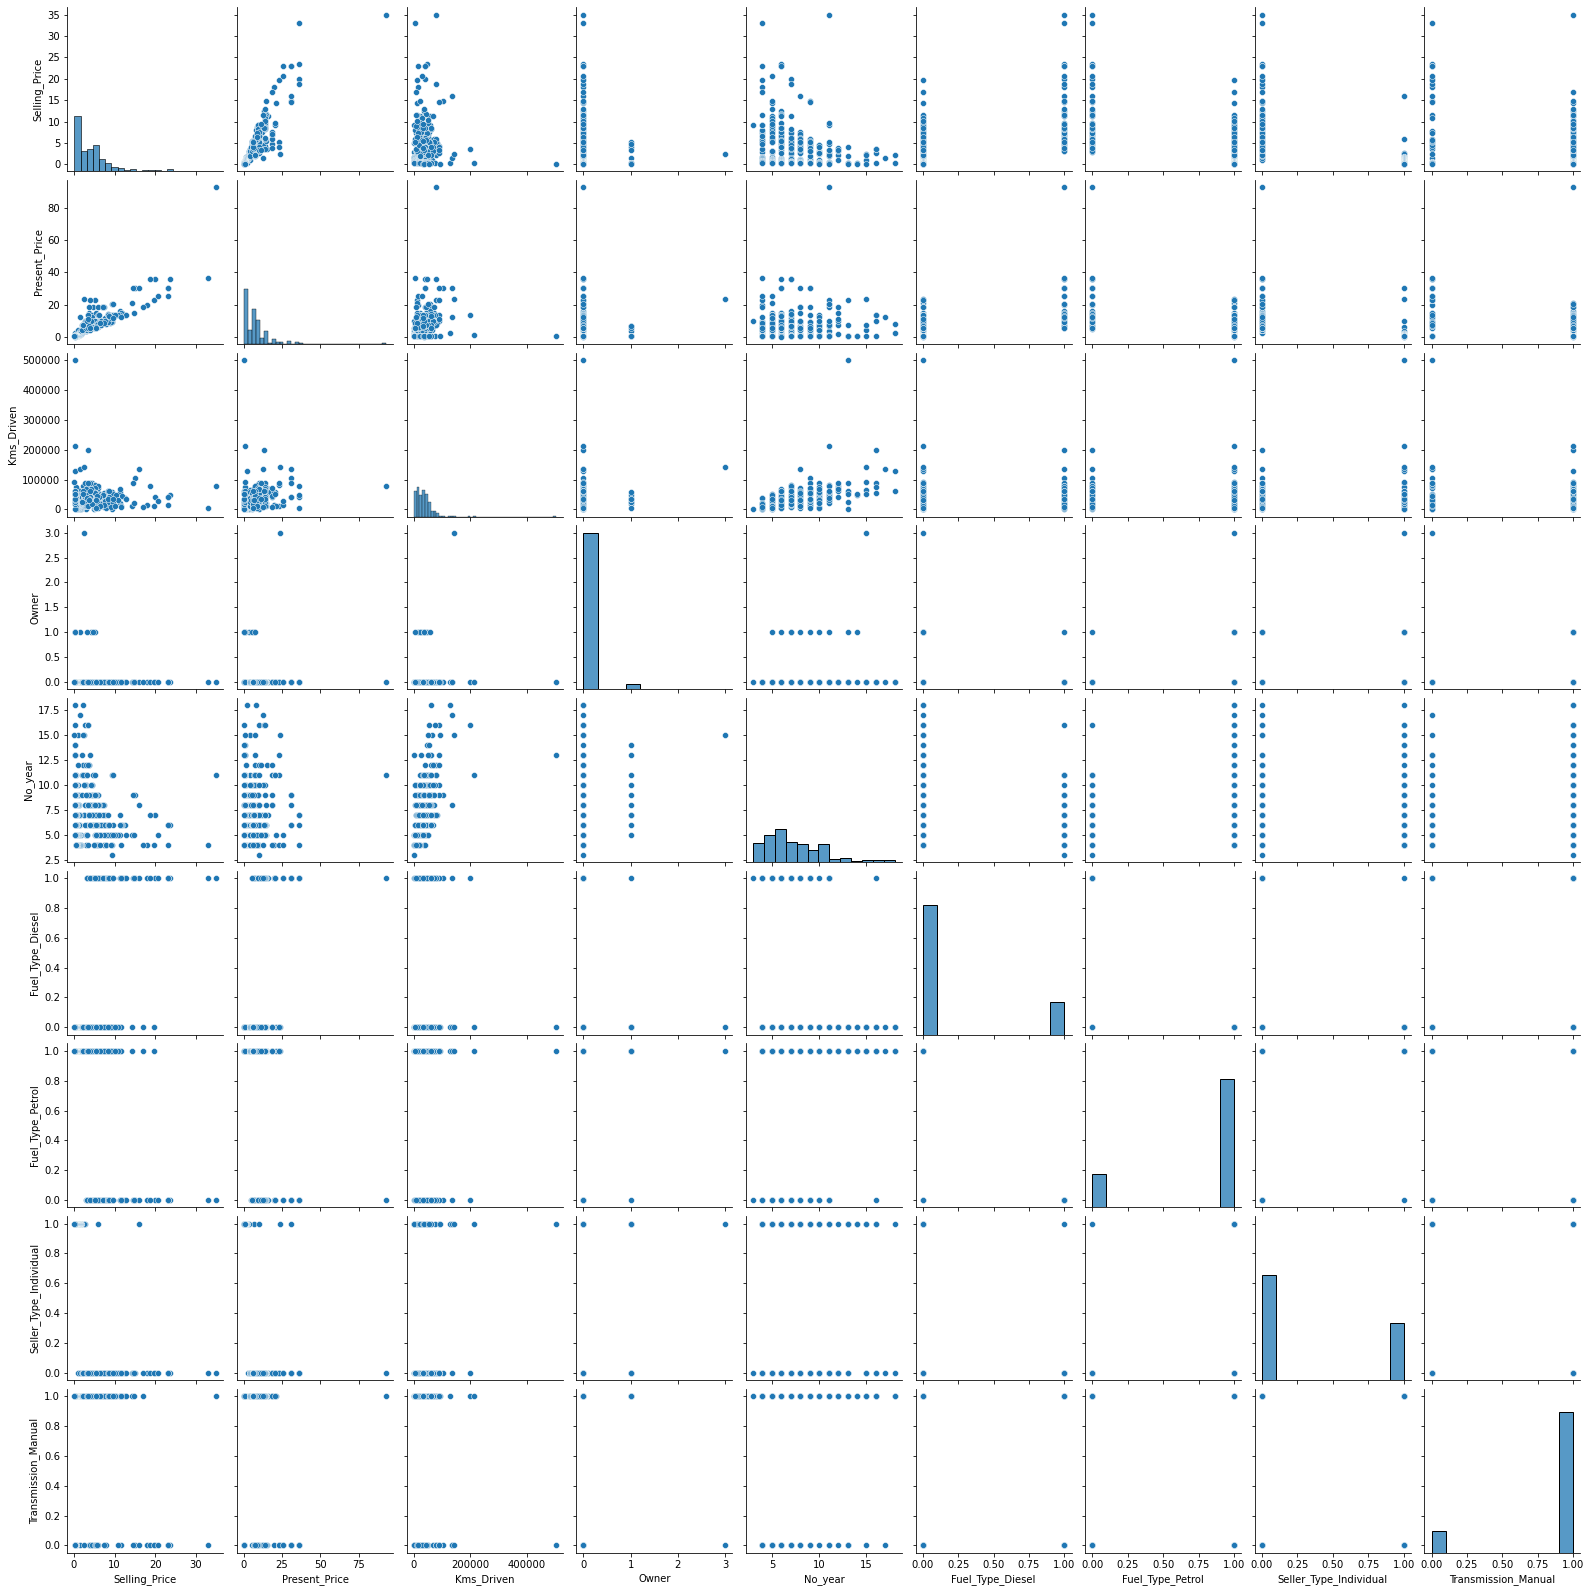

In [19]:
sns.pairplot(data)

<AxesSubplot:>

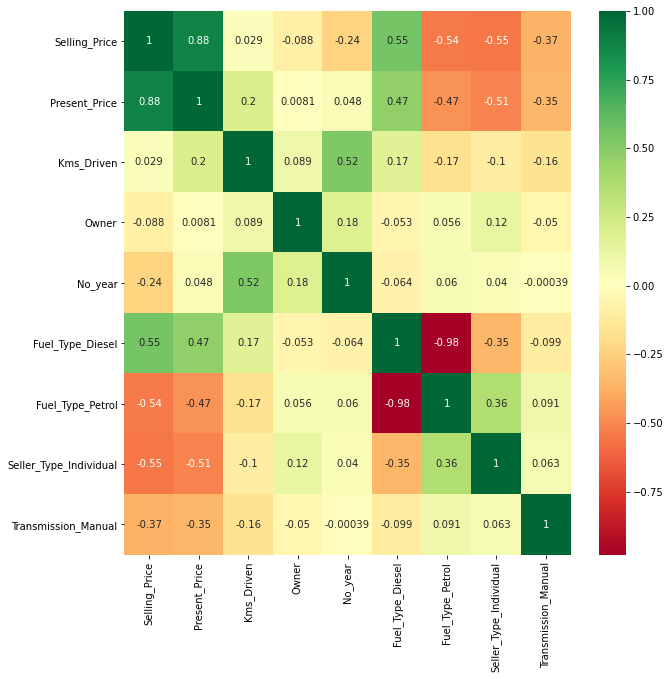

In [20]:
# Plot heat map 
corrmat=data.corr() 
top_corr_features=corrmat.index 
plt.figure(figsize=(10,10))  
sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [21]:
# Split data into dependent and independent variables
X = data.iloc[:,1:]
y = data.iloc[:,0]

In [23]:
X.shape

(301, 8)

In [24]:
# feature importance
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [25]:
print(model.feature_importances_)

[0.3502769  0.0433028  0.0005402  0.07594555 0.23890701 0.01078831
 0.13248948 0.14774976]


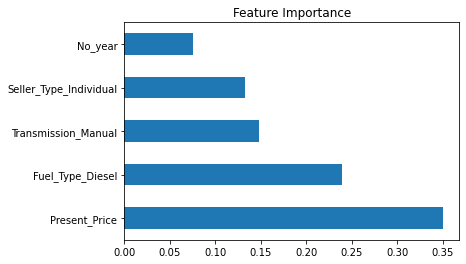

In [26]:
# print graph of feature importance
feature_importances = pd.Series(model.feature_importances_, index=X.columns) 
feature_importances.nlargest(5).plot(kind='barh', title='Feature Importance')
plt.show()

In [27]:
# Split data into train and test parts
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [28]:
RF = RandomForestRegressor()

In [29]:
# Hyper parametrs for RandomForestRegressor
# Number of trees in Random Forest
n_estimators = [int(x) for x in np.linspace(100,1200,12)]
# Maximum lefls of tree
max_depth= [int(x) for x in np.linspace(5,30,6)]
# Number of features to consider at every split
max_features= ['auto', 'sqrt']
# Minimum numbers of samples required to split a node
min_samples_split = [2,5,10,15,100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,5,10]


In [30]:
# Creat RandomizedSearchCV

random_CV = {'n_estimators': n_estimators,
             'max_depth': max_depth,
             'max_features':max_features,
             'min_samples_split': min_samples_split,
             'min_samples_leaf':min_samples_leaf
}

In [43]:
# Use RandomizedSearchCV to find best parametrs
RF_random = RandomizedSearchCV(estimator=RF,param_distributions=random_CV,scoring='neg_mean_squared_error', n_iter=10, cv=5,verbose=2,random_state=42)

In [44]:
# Fit the model. See steps of RandomizedSearchCV
RF_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [45]:
# print best parametrs
RF_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [46]:
# Predict
predictions = RF_random.predict(X_test)
predictions

array([ 2.45032,  8.24772,  9.5778 ,  3.78015,  5.71925,  1.02228,
        3.16332,  5.9455 ,  4.81469,  6.27715, 20.59818, 11.2794 ,
        7.9961 ,  4.77968,  3.8571 ,  0.95996,  0.4981 ,  0.80892,
        6.5454 ,  4.11841,  4.35991, 16.94999,  7.29551,  4.09696,
        6.77325,  2.85003,  7.67666,  5.96895,  1.10671,  0.88334,
        5.74315,  7.21949,  0.42347,  9.0765 ,  0.55246,  5.89259,
        5.17406,  3.21106,  1.45916,  1.09213,  5.05257,  6.70518,
        0.27053,  7.17317,  5.10183,  5.3502 ,  6.44823,  8.7284 ,
        8.30236, 21.97871,  0.54397,  1.12574,  1.24046,  0.53642,
        5.01634,  3.53218,  7.29629,  8.16283, 11.66535,  3.46989,
        6.29575])

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

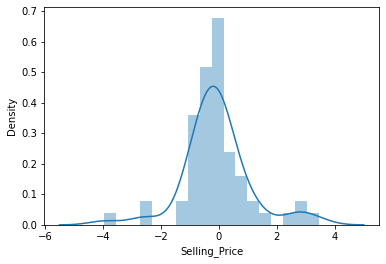

In [47]:
# Plot difference between actual and predicted points
sns.distplot(y_test-predictions)


In [48]:
# The predictions are normally distributed. Which means that our model is good.

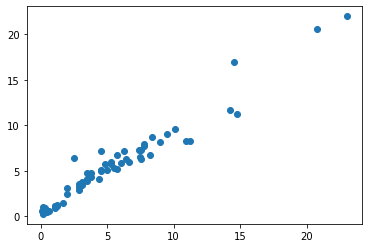

In [49]:
plt.scatter(y_test,predictions)

In [50]:
# Scatter is linear. It means that the model is good.

In [51]:
# Model evaluation
RF_RMSE = np.sqrt(mean_squared_error(y_test, predictions))
RF_RMSE

1.1677976842189808

In [52]:
# Pickle the model
pickle.dump(RF_random, open("RandomForestRegressor.pkl", "wb"))